<a href="https://colab.research.google.com/github/Speedbird45Bravo/Keras_projects_21/blob/main/keras_SPI1920_32921.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

url = "https://projects.fivethirtyeight.com/soccer-api/club/spi_matches.csv"
df = pd.read_csv(url, parse_dates=['date']).dropna()
df = df[(df.season >= 2018) & (df.league=='Barclays Premier League')]
df['spi_margin'] = np.abs(df['spi1'] - df['spi2'])
X = df[['spi1', 'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2', 'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2']].reset_index(drop=True)
y = df[['spi_margin']].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [10]:
ss = StandardScaler().fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [13]:
model = Sequential()
model.add(Dense(64, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/100
6/6 [==============================] - 1s 53ms/step - loss: 195.2662 - mae: 11.0066 - val_loss: 189.1338 - val_mae: 11.0479
Epoch 2/100
6/6 [==============================] - 0s 15ms/step - loss: 174.6903 - mae: 10.3916 - val_loss: 175.2689 - val_mae: 10.5890
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 160.5561 - mae: 9.9136 - val_loss: 161.3637 - val_mae: 10.1206
Epoch 4/100
6/6 [==============================] - 0s 15ms/step - loss: 153.7241 - mae: 9.7288 - val_loss: 147.3683 - val_mae: 9.6435
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 132.0534 - mae: 8.9225 - val_loss: 132.8616 - val_mae: 9.1313
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: 120.4972 - mae: 8.4639 - val_loss: 118.3150 - val_mae: 8.5898
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: 106.8813 - mae: 8.0046 - val_loss: 103.3643 - val_mae: 8.0122
Epoch 8/100
6/6 [==============================] - 0s 15m

In [15]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print("Mean Average Error: %.4f" % mae)

7/7 [==============================] - 0s 2ms/step - loss: 1.7827 - mae: 0.9794
Mean Average Error: 0.9794


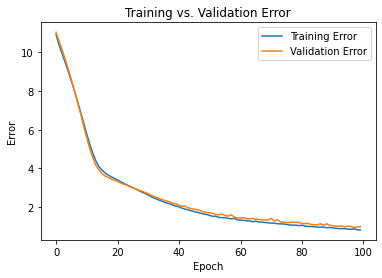

In [22]:
plt.plot(history.history['mae'], label='Training Error')
plt.plot(history.history['val_mae'], label='Validation Error')
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Training vs. Validation Error")
plt.legend()
plt.show()